In [10]:
#| code-summary: Load packages
#| code-fold: true

# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [11]:
#| echo: false
pd.options.display.notebook_repr_html = False

# Transforming I
## A

In [13]:
# 1. Had an arrival delay of two or more hours
# Load the nycflight13 dataset
flights = sm.datasets.get_rdataset("flights", "nycflights13").data.drop(columns="time_hour")

In [14]:
flights.query('arr_delay > 120').head(3)

     year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
119  2013      1    1    811.00             630     101.00   1047.00   
151  2013      1    1    848.00            1835     853.00   1001.00   
218  2013      1    1    957.00             733     144.00   1056.00   

     sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
119             830     137.00      MQ    4576  N531MQ    LGA  CLT    118.00   
151            1950     851.00      MQ    3944  N942MQ    JFK  BWI     41.00   
218             853     123.00      UA     856  N534UA    EWR  BOS     37.00   

     distance  hour  minute  
119       544     6      30  
151       184    18      35  
218       200     7      33  

In [22]:
# 2. Flew to Houston (IAH or HOU)
flights.query('dest == "IAH" | dest == "HOU"').head(3)

    year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   2013      1    1    517.00             515       2.00    830.00   
1   2013      1    1    533.00             529       4.00    850.00   
32  2013      1    1    623.00             627      -4.00    933.00   

    sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0              819      11.00      UA    1545  N14228    EWR  IAH    227.00   
1              830      20.00      UA    1714  N24211    LGA  IAH    227.00   
32             932       1.00      UA     496  N459UA    LGA  IAH    229.00   

    distance  hour  minute  
0       1400     5      15  
1       1416     5      29  
32      1416     6      27  

In [8]:
# 3. Departed in summer (July, August, and September)
flights.query('month in [7, 8, 9]').head(3)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
250450  2013      7    1      1.00            2029     212.00    236.00   
250451  2013      7    1      2.00            2359       3.00    344.00   
250452  2013      7    1     29.00            2245     104.00    151.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
250450            2359     157.00      B6     915  N653JB    JFK  SFO   
250451             344       0.00      B6    1503  N805JB    JFK  SJU   
250452               1     110.00      B6     234  N348JB    JFK  BTV   

        air_time  distance  hour  minute  
250450    315.00      2586    20      29  
250451    200.00      1598    23      59  
250452     66.00       266    22      45  

In [9]:
# 4. Arrived more than two hours late, but didn’t leave late
flights.query('arr_delay > 120 & dep_delay <= 0').head(3)

       year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
22911  2013      1   27   1419.00            1420      -1.00   1754.00   
33011  2013     10    7   1350.00            1350       0.00   1736.00   
33019  2013     10    7   1357.00            1359      -2.00   1858.00   

       sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
22911            1550     124.00      MQ    3728  N1EAMQ    EWR  ORD   
33011            1526     130.00      EV    5181  N611QX    LGA  MSN   
33019            1654     124.00      AA    1151  N3CMAA    LGA  DFW   

       air_time  distance  hour  minute  
22911    135.00       719    14      20  
33011    117.00       812    13      50  
33019    192.00      1389    13      59  

In [10]:
# 5. Were delayed by at least an hour, but made up over 30 minutes in flight
flights.query('dep_delay > 60 & arr_delay - dep_delay < -30').head(5)

      year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
815   2013      1    1   2205.00            1720     285.00     46.00   
832   2013      1    1   2326.00            2130     116.00    131.00   
2286  2013      1    3   1503.00            1221     162.00   1803.00   
2508  2013      1    3   1839.00            1700      99.00   2056.00   
2522  2013      1    3   1850.00            1745      65.00   2148.00   

      sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
815             2040     246.00      AA    1999  N5DNAA    EWR  MIA    146.00   
832               18      73.00      B6     199  N594JB    JFK  LAS    290.00   
2286            1555     128.00      UA     551  N835UA    EWR  SFO    320.00   
2508            1950      66.00      AA     575  N631AA    JFK  EGE    239.00   
2522            2120      28.00      AA     177  N332AA    JFK  SFO    314.00   

      distance  hour  minute  
815       1085    17      20  
832       22

In [11]:
# 6. Departed between midnight and 6am (inclusive)
flights.query('dep_time >= 0 & dep_time <= 600').head(3)

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1    517.00             515       2.00    830.00   
1  2013      1    1    533.00             529       4.00    850.00   
2  2013      1    1    542.00             540       2.00    923.00   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819      11.00      UA    1545  N14228    EWR  IAH    227.00   
1             830      20.00      UA    1714  N24211    LGA  IAH    227.00   
2             850      33.00      AA    1141  N619AA    JFK  MIA    160.00   

   distance  hour  minute  
0      1400     5      15  
1      1416     5      29  
2      1089     5      40  

In [21]:
# 7. Find the fastest flights.
(
    flights.assign(speed=flights.distance / flights.air_time)
    .sort_values(by="speed", ascending=False)
    .head(7)
)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
216447  2013      5   25   1709.00            1700       9.00   1923.00   
251999  2013      7    2   1558.00            1513      45.00   1745.00   
205388  2013      5   13   2040.00            2025      15.00   2225.00   
157516  2013      3   23   1914.00            1910       4.00   2045.00   
10223   2013      1   12   1559.00            1600      -1.00   1849.00   
70640   2013     11   17    650.00             655      -5.00   1059.00   
129835  2013      2   21   2355.00            2358      -3.00    412.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
216447            1937     -14.00      DL    1499  N666DN    LGA  ATL   
251999            1719      26.00      EV    4667  N17196    EWR  MSP   
205388            2226      -1.00      EV    4292  N14568    EWR  GSP   
157516            2043       2.00      EV    3805  N12567    EWR  BNA   
10223             1917     -28.00 

In [13]:
# 8. Sort flights to find the most delayed flights. Find the flights that left earliest.
flights.sort_values(by="dep_delay", ascending=False).head(3)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
7072    2013      1    9    641.00             900    1301.00   1242.00   
235778  2013      6   15   1432.00            1935    1137.00   1607.00   
8239    2013      1   10   1121.00            1635    1126.00   1239.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
7072              1530    1272.00      HA      51  N384HA    JFK  HNL   
235778            2120    1127.00      MQ    3535  N504MQ    JFK  CMH   
8239              1810    1109.00      MQ    3695  N517MQ    EWR  ORD   

        air_time  distance  hour  minute  
7072      640.00      4983     9       0  
235778     74.00       483    19      35  
8239      111.00       719    16      35  

In [14]:
flights.sort_values(by="dep_delay", ascending=True).head(3)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
89673   2013     12    7   2040.00            2123     -43.00     40.00   
113633  2013      2    3   2022.00            2055     -33.00   2240.00   
64501   2013     11   10   1408.00            1440     -32.00   1549.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
89673             2352      48.00      B6      97  N592JB    JFK  DEN   
113633            2338     -58.00      DL    1715  N612DL    LGA  MSY   
64501             1559     -10.00      EV    5713  N825AS    LGA  IAD   

        air_time  distance  hour  minute  
89673     265.00      1626    21      23  
113633    162.00      1183    20      55  
64501      52.00       229    14      40  

In [15]:
# 9. Which flights travelled the farthest? 
flights.sort_values(by="distance", ascending=False).head(3)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
50676   2013     10   26   1004.00            1000       4.00   1435.00   
108078  2013     12   28    933.00             930       3.00   1520.00   
100067  2013     12   19    924.00             930      -6.00   1450.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
50676             1450     -15.00      HA      51  N386HA    JFK  HNL   
108078            1535     -15.00      HA      51  N384HA    JFK  HNL   
100067            1535     -45.00      HA      51  N386HA    JFK  HNL   

        air_time  distance  hour  minute  
50676     608.00      4983    10       0  
108078    633.00      4983     9      30  
100067    609.00      4983     9      30  

In [16]:
# Which travelled the shortest?
flights.sort_values(by="distance", ascending=True).head(3)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
275945  2013      7   27       NaN             106        NaN       NaN   
3083    2013      1    4   1240.00            1200      40.00   1333.00   
16328   2013      1   19   1617.00            1617       0.00   1722.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
275945             245        NaN      US    1632     NaN    EWR  LGA   
3083              1306      27.00      EV    4193  N14972    EWR  PHL   
16328             1722       0.00      EV    4616  N12540    EWR  PHL   

        air_time  distance  hour  minute  
275945       NaN        17     1       6  
3083       30.00        80    12       0  
16328      34.00        80    16      17  

In [28]:
# 10. 각 도착지로 출항하는 항공편이 1년 중 몇 일 있는가?
(
    flights.groupby(["month", "day", "dest"])
    .size()
    .reset_index(name='n')
    .groupby("dest")
    .size()
)

dest
ABQ    254
ACK    155
ALB    260
      ... 
TVC     37
TYS    322
XNA    314
Length: 105, dtype: int64

In [85]:
# 11. 1년 중 300일 이상 출항하는 도착지들을 구하면?
(
    flights.groupby(["month", "day", "dest"])
    .size()
    .reset_index(name='n')
    .groupby("dest")
    .size()
    .reset_index(name="n")
    .query('n >= 300')
)

    dest    n
4    ATL  365
5    AUS  365
10   BNA  365
..   ...  ...
101  TUL  314
103  TYS  322
104  XNA  314

[78 rows x 2 columns]

## B.

### 1.

In [10]:
# 1. Our definition of cancelled flights (dep_delay or arr_delay is missing) is slightly suboptimal. Why? Which is the most important column?
# 예를 들어, 출발지연은 missing이 아니나 도착지연은 missing인 것이 있음
flights.query("dep_delay.isna() and not arr_delay.isna()")[
    ["dep_time", "arr_time", "dep_delay", "arr_delay"]
]

Empty DataFrame
Columns: [dep_time, arr_time, dep_delay, arr_delay]
Index: []

즉, 출발지연이 misssing이면 도착지연도 missing임.

In [11]:
flights.query("not dep_delay.isna() and arr_delay.isna()")[
    ["dep_time", "arr_time", "dep_delay", "arr_delay"]
]

        dep_time  arr_time  dep_delay  arr_delay
471      1525.00   1934.00      -5.00        NaN
477      1528.00   2002.00      29.00        NaN
615      1740.00   2158.00      -5.00        NaN
...          ...       ...        ...        ...
334495   1214.00   1801.00     -11.00        NaN
335534   1734.00   2159.00      23.00        NaN
335805    559.00       NaN      -1.00        NaN

[1175 rows x 4 columns]

출발지연은 missing이 아니나 도작지연은 missing인 것이 있음.  
아마도 도착지연이 missing인 경우는 결항은 아니고, 출발지연이 missing인 것이 결항된 항공편이라고 볼 수 있음. (출발지연이 missing이면 도착지연도 missing이므로)  
도착지연이 더 중요한 지표일 것임; 연결된 항공편을 놓칠 수 있기 때문에. 출발지연은 오히려 좋을 수도..


### 2.

In [20]:
# 2. Look at the number of cancelled flights per day. Is there a pattern? Is the proportion of cancelled flights related to the (daily) average delay?
# 취소되는 항공편들이 많은 것과 관계 있는 것은 무엇이 있을까…

In [31]:
# 출항한 항공편이 많을수록 결항편도 많음.. 당연? 선형관계?  >> 결항 비율로
cancelled_per_day = (
    flights.assign(
        cancelled = lambda x: x.dep_delay.isna() | x.arr_delay.isna())  # "|": bitwise "or"
    .groupby(["month", "day"])["cancelled"]
    .agg(["sum", "count"])  # sum(boolean) = True의 개수, mean(boolean) = True의 비율
)
cancelled_per_day.head(7)

           sum  count
month day            
1     1     11    842
      2     15    943
      3     14    914
      4      7    915
      5      3    720
      6      3    832
      7      3    933

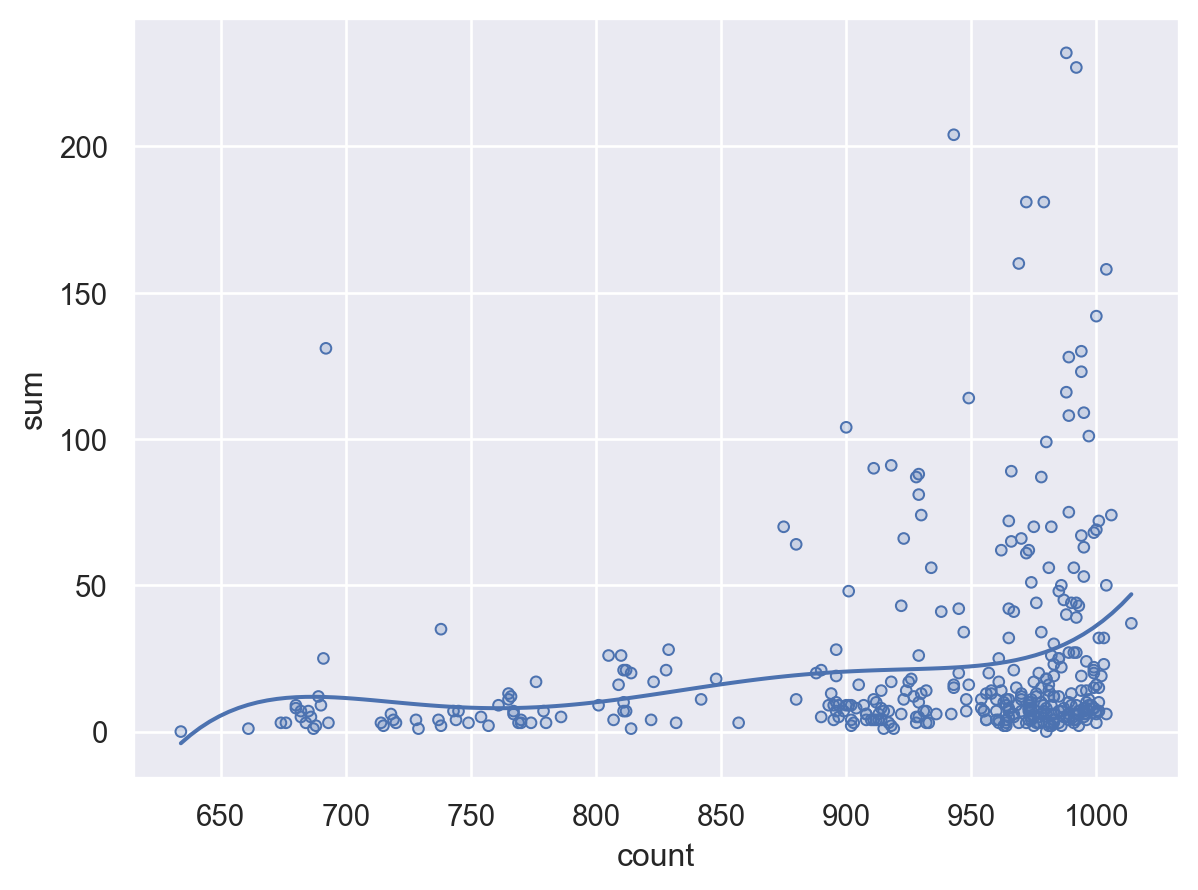

In [25]:
(
    so.Plot(cancelled_per_day.query('sum < 300'), x='count', y='sum')
    .add(so.Dots())
    .add(so.Line(), so.PolyFit(5))
)

In [33]:
# 항공기가 많이 지연될수록 결항비율도 큰가? 오래 지연될수록 뒤에 출발하는 항공편은 결항...

def get_delayed_positive(g):
    return pd.Series([
        g["cancelled"].mean(),
        g["dep_delay"].apply(lambda x: 0 if x < 0 else x).mean(),
        g["arr_delay"].apply(lambda x: 0 if x < 0 else x).mean(),
    ], index=["cancelled_prop", "avg_dep_delay", "avg_arr_delay"])

cancelled_and_delays = (
    flights.assign(
        cancelled = lambda x: x.dep_delay.isna() | x.arr_delay.isna())
    .groupby(["month", "day"])
    .apply(get_delayed_positive)
)

cancelled_and_delays

           cancelled_prop  avg_dep_delay  avg_arr_delay
month day                                              
1     1              0.01          13.72          18.02
      2              0.02          15.70          18.47
      3              0.02          13.02          14.14
...                   ...            ...            ...
12    29             0.02          24.14          25.70
      30             0.02          13.14          15.87
      31             0.02           9.71          12.44

[365 rows x 3 columns]

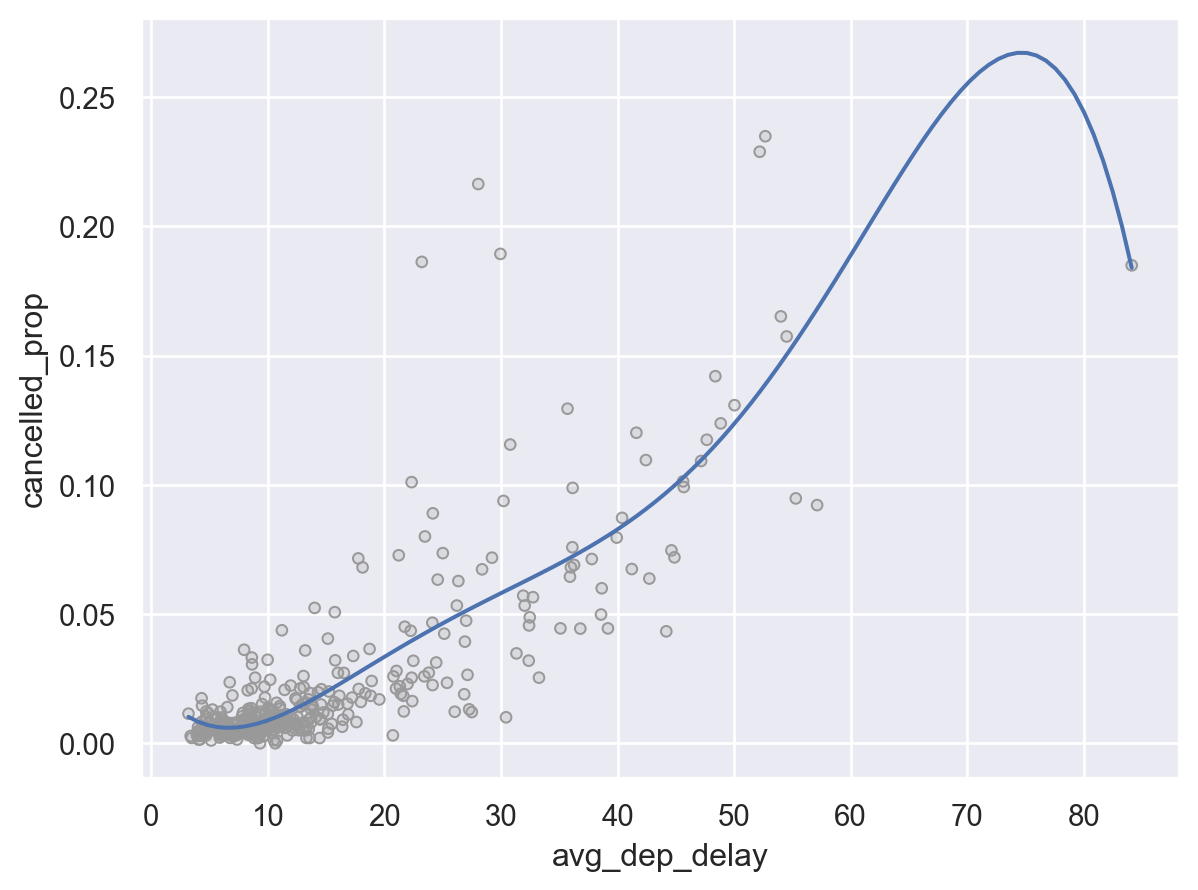

In [33]:
(
    so.Plot(
        cancelled_and_delays.query("cancelled_prop < .3"),
        x="avg_dep_delay",
        y="cancelled_prop",
    )
    .add(so.Dots(color=".6"))
    .add(so.Line(), so.PolyFit(5))
)

In [34]:
(
    so.Plot(
        cancelled_and_delays.query("cancelled_prop < 0.05"),
        x="avg_arr_delay",
        y="cancelled_prop",
    )
    .add(so.Dots(color=".6"))
    .add(so.Line(), so.PolyFit(5))
)

### 3.

In [36]:
# 3. What time of day should you fly if you want to avoid delays as much as possible?
# 도착지연이 가장 적은 시간대는 언제인가?
(
    flights.groupby("sched_dep_time")["arr_delay"]
    .mean()
    # .reset_index()
    .sort_values(ascending=True)
    .head(7)
)

sched_dep_time
712    -35.35
626    -30.00
505    -26.50
2208   -26.00
516    -25.75
555    -25.00
557    -23.67
Name: arr_delay, dtype: float64

In [44]:
# minus delay는 제외하고 도착지연의 평균을 구한다면,
(
    flights
    .groupby(["sched_dep_time"])["arr_delay"]
    # .apply(lambda x: x.map(lambda x: 0 if x < 0 else x).mean())
    .mean()
    .sort_values(ascending=False)
    .head(7)
)

sched_dep_time
2207   105.33333
1848    69.00000
1752    68.25000
1531    65.09091
2339    59.00000
1739    56.14516
1653    55.38095
Name: arr_delay, dtype: float64

In [49]:
# minus delay는 제외하고 도착지연의 평균을 구한다면,
(
    flights
    .groupby(["sched_dep_time"])["arr_delay"]
    .apply(lambda x: x.map(lambda x: 0 if x < 0 else x).mean())
    .sort_values(ascending=True)
    .head(7)
)

sched_dep_time
555    0.00000
538    0.00000
1424   0.00000
535    0.00000
2208   0.00000
2345   0.00000
528    0.00000
Name: arr_delay, dtype: float64

In [46]:
def get_delayed_positive(g):
    return pd.Series(
        [
            g["arr_delay"].map(lambda x: 0 if x < 0 else x).mean(),
            g["arr_delay"].count(),
        ],
        index=["avg_arr_delay", "n_total"],
    )

time_delay = (
    flights.groupby(["sched_dep_time"])
    .apply(get_delayed_positive)
    .reset_index()
)
time_delay

      sched_dep_time  avg_arr_delay   n_total
0                106            NaN   0.00000
1                500        2.95000 340.00000
2                501        0.00000   1.00000
...              ...            ...       ...
1018            2355       11.79452  73.00000
1019            2358       16.63636  44.00000
1020            2359       16.51111 810.00000

[1021 rows x 3 columns]

::: {.callout-tip}
```python
flights[["arr_delay"]].mean()  # return a Series
# arr_delay   6.90
# dtype: float64

flights["arr_delay"].mean()  # return a scalar
# 6.90
```
:::

In [51]:
# 시각화해서 살펴보면,
(
    so.Plot(time_delay, x='sched_dep_time', y='avg_arr_delay')
    .add(so.Dots(color=".6"), pointsize='n_total')
    .add(so.Line(), so.PolyFit(5))
    .limit(y=(-5, 60))
    .scale(pointsize=(1, 30))
)

In [82]:
# 이상치들은 샘플수가 작은가?
time_delay.sort_values(by="avg_arr_delay", ascending=False).head(7)

     sched_dep_time  avg_arr_delay  n_total
991            2207         105.33     3.00
798            1848          70.62    16.00
742            1752          68.25     4.00
601            1531          66.45    11.00
683            1653          61.19    21.00
28              558          61.00     3.00
729            1739          59.27    62.00

### 4.

In [ ]:
# 4. For each destination, compute the total minutes of delay. For each flight, compute the proportion of the total delay for its destination.

In [52]:
# For each destination, compute the total minutes of delay.
total_delay = flights.groupby("dest")["arr_delay"].sum().reset_index(name="total_delay")
total_delay

    dest  total_delay
0    ABQ   1113.00000
1    ACK   1281.00000
2    ALB   6018.00000
..   ...          ...
102  TVC   1232.00000
103  TYS  13912.00000
104  XNA   7406.00000

[105 rows x 2 columns]

In [56]:
# For each flight, compute the proportion of the total delay for its destination.
# Merge를 이용하면,
(
    flights
    .merge(total_delay, on="dest")
    .assign(prop_delay = lambda x: x.arr_delay / x.total_delay)
    .sort_values(["year", "month", "day", "hour", "minute"])
    .head(3)
)


      year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0     2013      1    1 517.00000             515    2.00000 830.00000   
1     2013      1    1 533.00000             529    4.00000 850.00000   
7198  2013      1    1 542.00000             540    2.00000 923.00000   

      sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0                819   11.00000      UA    1545  N14228    EWR  IAH 227.00000   
1                830   20.00000      UA    1714  N24211    LGA  IAH 227.00000   
7198             850   33.00000      AA    1141  N619AA    JFK  MIA 160.00000   

      distance  hour  minute  total_delay  prop_delay  
0         1400     5      15  30046.00000     0.00037  
1         1416     5      29  30046.00000     0.00067  
7198      1089     5      40   3467.00000     0.00952  

In [59]:
# transform을 이용하면,
flights.groupby("dest")["arr_delay"].transform("sum")
flights["total_delay"] = flights.groupby("dest")["arr_delay"].transform("sum")
flights.head(3)

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1 517.00000             515    2.00000 830.00000   
1  2013      1    1 533.00000             529    4.00000 850.00000   
2  2013      1    1 542.00000             540    2.00000 923.00000   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819   11.00000      UA    1545  N14228    EWR  IAH 227.00000   
1             830   20.00000      UA    1714  N24211    LGA  IAH 227.00000   
2             850   33.00000      AA    1141  N619AA    JFK  MIA 160.00000   

   distance  hour  minute  total_delay  
0      1400     5      15  30046.00000  
1      1416     5      29  30046.00000  
2      1089     5      40   3467.00000  

In [60]:
flights.assign(prop_delay = lambda x: x.arr_delay / x.total_delay).head(3)

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1 517.00000             515    2.00000 830.00000   
1  2013      1    1 533.00000             529    4.00000 850.00000   
2  2013      1    1 542.00000             540    2.00000 923.00000   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819   11.00000      UA    1545  N14228    EWR  IAH 227.00000   
1             830   20.00000      UA    1714  N24211    LGA  IAH 227.00000   
2             850   33.00000      AA    1141  N619AA    JFK  MIA 160.00000   

   distance  hour  minute  total_delay  prop_delay  
0      1400     5      15  30046.00000     0.00037  
1      1416     5      29  30046.00000     0.00067  
2      1089     5      40   3467.00000     0.00952  

### 5.

In [297]:
# 5. Find all destinations that are flown by at least two carriers. Use that information to rank the carriers.

flights.groupby("dest")["carrier"].nunique()

dest
ABQ    1
ACK    1
ALB    1
      ..
TVC    2
TYS    2
XNA    2
Name: carrier, Length: 105, dtype: int64

In [61]:
dest_carrier = flights.copy()
dest_carrier["carrier_n"] = flights.groupby("dest")["carrier"].transform("nunique")

dest_carrier.query('carrier_n >= 2').head(3)

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1 517.00000             515    2.00000 830.00000   
1  2013      1    1 533.00000             529    4.00000 850.00000   
2  2013      1    1 542.00000             540    2.00000 923.00000   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819   11.00000      UA    1545  N14228    EWR  IAH 227.00000   
1             830   20.00000      UA    1714  N24211    LGA  IAH 227.00000   
2             850   33.00000      AA    1141  N619AA    JFK  MIA 160.00000   

   distance  hour  minute  total_delay  carrier_n  
0      1400     5      15  30046.00000          2  
1      1416     5      29  30046.00000          2  
2      1089     5      40   3467.00000          3  

In [63]:
(
    dest_carrier.query("carrier_n >= 2")
    .groupby("carrier")["dest"]
    .nunique()
    .reset_index(name="n_dest")
    .assign(rank=lambda x: x.n_dest.rank(ascending=False, method="min"))
    .sort_values("rank")
)

   carrier  n_dest     rank
5       EV      51  1.00000
0       9E      48  2.00000
11      UA      42  3.00000
..     ...     ...      ...
2       AS       1 14.00000
6       F9       1 14.00000
8       HA       1 14.00000

[16 rows x 3 columns]

## C.

### 1.

In [ ]:
# 1. Which carrier has the worst arrival delays? Challenge: can you disentangle the effects of bad airports vs. bad carriers? Why/why not?

In [83]:
# Total delay by carrier within each origin, dest
arr_delay = (
    flights.groupby(["carrier", "origin", "dest"])["arr_delay"]
    .agg(["mean", "count"])
    .rename(columns={"mean": "arr_delay", "count": "flights"})
    .reset_index()
)
arr_delay

    carrier origin dest  arr_delay  flights
0        9E    EWR  ATL      -6.25        4
1        9E    EWR  CVG       1.40      796
2        9E    EWR  DTW       2.54      220
..      ...    ...  ...        ...      ...
436      YV    LGA  CLT      12.86      258
437      YV    LGA  IAD      18.92      278
438      YV    LGA  PHL     -14.38        8

[439 rows x 5 columns]

In [84]:
# Total delay within each origin dest
arr_delay_total = (
    arr_delay.groupby(["origin", "dest"])[["arr_delay", "flights"]]
    .sum()
    .reset_index()
    .rename(columns={"arr_delay": "arr_delay_total", "flights": "flights_total"})
)
arr_delay_total

    origin dest  arr_delay_total  flights_total
0      EWR  ALB            14.40            418
1      EWR  ANC            -2.50              8
2      EWR  ATL            33.79           4876
..     ...  ...              ...            ...
221    LGA  TVC            31.75             73
222    LGA  TYS             3.89            265
223    LGA  XNA           125.96            709

[224 rows x 4 columns]

In [85]:
# using `transform` instead of `merge`
arr_delay[["arr_delay_total", "flights_total"]] = (
    arr_delay
    .groupby(["origin", "dest"])[["arr_delay", "flights"]]
    .transform("sum")
)
arr_delay

    carrier origin dest  arr_delay  flights  arr_delay_total  flights_total
0        9E    EWR  ATL      -6.25        4            33.79           4876
1        9E    EWR  CVG       1.40      796            22.60           2513
2        9E    EWR  DTW       2.54      220            88.35           3009
..      ...    ...  ...        ...      ...              ...            ...
436      YV    LGA  CLT      12.86      258            45.37           5961
437      YV    LGA  IAD      18.92      278            30.48           1659
438      YV    LGA  PHL     -14.38        8            -8.32            598

[439 rows x 7 columns]

In [9]:
# relative delay: average delay of each carrier - average delay of other carriers
arr_delay_relative = arr_delay.assign(
    arr_delay_others_mean=lambda x: (x.arr_delay_total - x.arr_delay)
    / (x.flights_total - x.flights),
    arr_delay_mean=lambda x: x.arr_delay / x.flights,
    arr_delay_diff=lambda x: x.arr_delay_mean - x.arr_delay_others_mean,
)
arr_delay_relative

    carrier origin dest  arr_delay  flights  arr_delay_total  flights_total  \
0        9E    EWR  ATL      -6.25        4            33.79           4876   
1        9E    EWR  CVG       1.40      796            22.60           2513   
2        9E    EWR  DTW       2.54      220            88.35           3009   
..      ...    ...  ...        ...      ...              ...            ...   
436      YV    LGA  CLT      12.86      258            45.37           5961   
437      YV    LGA  IAD      18.92      278            30.48           1659   
438      YV    LGA  PHL     -14.38        8            -8.32            598   

     arr_delay_others_mean  arr_delay_mean  arr_delay_diff  
0                     0.01           -1.56           -1.57  
1                     0.01            0.00           -0.01  
2                     0.03            0.01           -0.02  
..                     ...             ...             ...  
436                   0.01            0.05            0.04  
4

In [10]:
arr_delay_relative.groupby("carrier")["arr_delay_diff"].mean().sort_values(ascending=False)

carrier
OO   28.79
EV    5.35
VX    1.83
      ... 
DL   -1.72
MQ   -5.25
HA     NaN
Name: arr_delay_diff, Length: 16, dtype: float64

### 2.

In [64]:
# 2. Which plane (tailnum) has the worst on-time record?
## on-time: 늦게 도착하지 않은 항공편의 횟수로 이해

(
    flights
    .assign(on_time=lambda x: x.arr_delay <= 0 & x.arr_time.notna())
    .groupby("tailnum")["on_time"]
    .agg(["mean", "count"])
    .sort_values("mean")
)

           mean  count
tailnum               
N768SK  0.00000      1
N840MH  0.00000      1
N838AW  0.00000      2
...         ...    ...
N357SW  1.00000      8
N524AS  1.00000      9
N834MH  1.00000      1

[4043 rows x 2 columns]

In [93]:
# 극히 작은 운항횟수를 가진 비행기가 많음... : 제거

on_time = (
    flights
    .assign(on_time=lambda x: x.arr_delay <= 0)
    .groupby("tailnum")["on_time"]
    .agg(["mean", "count"])
)

(
    so.Plot(on_time, x="count", y="mean")
    .add(so.Dots(), so.Jitter(y=0.02))
    .limit(x=(0, 100))
)

In [94]:
on_time.query('count > 20').nsmallest(3, "mean")

         mean  count
tailnum             
N988AT   0.19     37
N983AT   0.25     32
N980AT   0.26     47

In [33]:
## on-time: 도착 delay의 길이로 파악하는 경우

(
    flights.groupby("tailnum")["arr_delay"]
    .agg(["mean", "count"])
    .query("count > 20")
    .nlargest(3, "mean")
)

         mean  count
tailnum             
N203FR  59.12     41
N645MQ  51.00     24
N956AT  47.65     34

### 3.

In [ ]:
# 3. Look at each destination. Can you find flights that are suspiciously fast? (i.e. flights that represent a potential data entry error).

In [5]:
flights = flights.assign(
    mph = lambda x: x.distance / x.air_time * 60
)

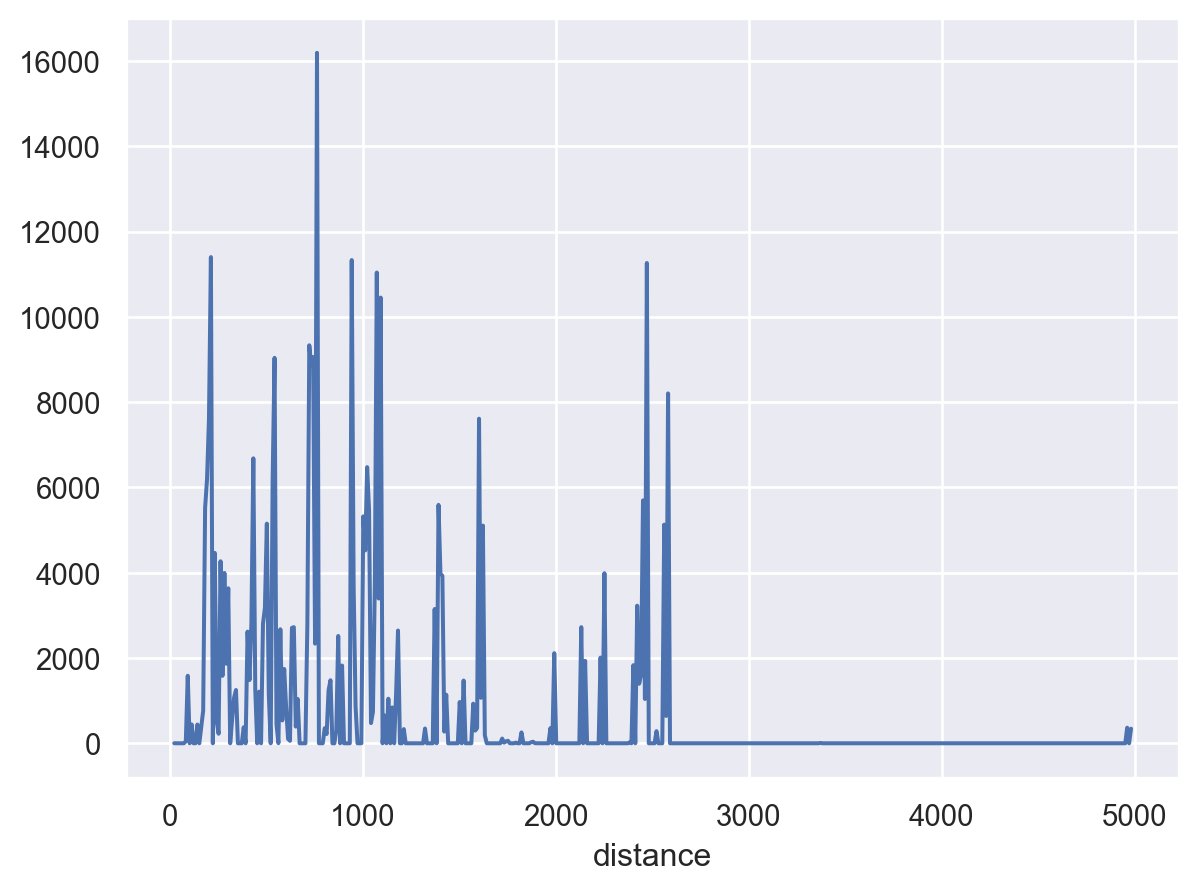

In [6]:
(
    so.Plot(flights, x='distance')
    .add(so.Line(), so.Hist(binwidth=10))
)

In [96]:
# 같은 루트를 비행하는 항공편들 안에서 특이점이라면 의심해 볼만함...

standardized = (
    flights.groupby(["origin", "dest"])["air_time"]
    .agg([("air_time_mean", "mean"), ("air_time_std", "std"), ("n", "count")])
    .reset_index()
)
standardized

    origin dest  air_time_mean  air_time_std     n
0      EWR  ALB          31.79          3.08   418
1      EWR  ANC         413.12         14.67     8
2      EWR  ATL         111.99          9.99  4876
..     ...  ...            ...           ...   ...
221    LGA  TVC          94.60          6.49    73
222    LGA  TYS          97.82          8.52   265
223    LGA  XNA         173.17         15.91   709

[224 rows x 5 columns]

In [123]:
def normalize(x):
    return (x - x.mean()) / x.std()

standardized_flights = flights.copy()
standardized_flights["air_time_z"] = flights.groupby(["origin", "dest"])[
    "air_time"
].transform(normalize)

In [124]:
(
    standardized_flights
    .assign(air_time_z_abs = lambda x: x.air_time_z.abs())
    .nlargest(5, "air_time_z_abs")
)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
237716  2013      6   17   1652.00            1700      -8.00   1856.00   
244468  2013      6   24   1932.00            1920      12.00   2228.00   
309910  2013      9    1   2237.00            1711     326.00     41.00   
230885  2013      6   10   1356.00            1300      56.00   1646.00   
248839  2013      6   29    755.00             800      -5.00   1035.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
237716            1815      41.00      US    2136  N967UW    LGA  BOS   
244468            2047     101.00      UA    1703  N37255    EWR  BOS   
309910            1851     350.00      B6    1516  N346JB    JFK  SYR   
230885            1414     152.00      US    2175  N745VJ    LGA  DCA   
248839             909      86.00      B6    1491  N328JB    JFK  ACK   

        air_time  distance  hour  minute  air_time_z  air_time_z_abs  
237716    107.00       184    17       

In [125]:
(
    so.Plot(standardized_flights, x='air_time_z')
    .add(so.Line(), so.Hist(binwidth=.1))
)

![](images/normal.png){width=600}  
&nbsp; Source: *The Truthful Art* by Albert Cairo

### 4.

In [127]:
# 4. Compute the air time of a flight relative to the shortest flight to that destination. Which flights were most delayed in the air?

# 비율의 차이
air_time_delayed = flights.copy()
air_time_delayed["air_time_delayed"] = flights.groupby(["origin", "dest"])[
    "air_time"
].transform(lambda x: (x - x.min()) / x.min())

air_time_delayed.sort_values("air_time_delayed", ascending=False).head(3)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
237716  2013      6   17   1652.00            1700      -8.00   1856.00   
230885  2013      6   10   1356.00            1300      56.00   1646.00   
248839  2013      6   29    755.00             800      -5.00   1035.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
237716            1815      41.00      US    2136  N967UW    LGA  BOS   
230885            1414     152.00      US    2175  N745VJ    LGA  DCA   
248839             909      86.00      B6    1491  N328JB    JFK  ACK   

        air_time  distance  hour  minute  air_time_delayed  
237716    107.00       184    17       0              4.10  
230885    131.00       214    13       0              3.09  
248839    141.00       199     8       0              3.03  

In [75]:
# 크기의 차이
air_time_delayed = flights.copy()
air_time_delayed["air_time_delayed"] = flights.groupby(["origin", "dest"])[
    "air_time"
].transform(lambda x: x - x.min())

air_time_delayed.sort_values("air_time_delayed", ascending=False).head(3)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time   
276578  2013      7   28   1727.00            1730      -3.00   2242.00  \
76185   2013     11   22   1812.00            1815      -3.00   2302.00   
24032   2013      1   28   1806.00            1700      66.00   2253.00   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest   
276578            2110      92.00      DL     841  N703TW    JFK  SFO  \
76185             2146      76.00      DL     426  N178DN    JFK  LAX   
24032             1950     183.00      AA     575  N5DBAA    JFK  EGE   

        air_time  distance  hour  minute    mph  air_time_delayed  
276578    490.00      2586    17      30 316.65            189.00  
76185     440.00      2475    18      15 337.50            165.00  
24032     382.00      1747    17       0 274.40            163.00  

### 5.

In [5]:
# 5. For each plane, count the number of flights before the first delay of greater than 1 hour.

flights_first_delay = (
    flights
    .query("arr_delay.notna()")
    .loc[:, ["tailnum", "year", "month", "day", "arr_delay"]]
    .assign(delay_1h=lambda x: x.arr_delay > 60)
    .sort_values(["tailnum", "year", "month", "day"])
)
flights_first_delay.head(7)

       tailnum  year  month  day  arr_delay  delay_1h
120316  D942DN  2013      2   11      91.00      True
157233  D942DN  2013      3   23      44.00     False
157799  D942DN  2013      3   24       2.00     False
254418  D942DN  2013      7    5     -11.00     False
523     N0EGMQ  2013      1    1      67.00      True
792     N0EGMQ  2013      1    1      17.00     False
1025    N0EGMQ  2013      1    2      -6.00     False

In [70]:
(
    flights_first_delay.groupby("tailnum")["delay_1h"]
    .apply(np.cumsum)
    .reset_index(level=0)
    .groupby("tailnum")
    .apply(lambda x: np.sum(x.delay_1h < 1))
    .sort_values(ascending=False)
)

tailnum
N717TW    119
N765US     97
N705TW     97
         ... 
N376AA      0
N378AA      0
D942DN      0
Length: 4037, dtype: int64

In [7]:
pd.options.display.max_rows = 25

In [8]:
flights_first_delay["cumulative_sum"] = (
    flights_first_delay.groupby("tailnum")["delay_1h"]
    .transform("cumsum")
)
flights_first_delay.iloc[353:377]

       tailnum  year  month  day  arr_delay  delay_1h  cumulative_sum
109925  N0EGMQ  2013     12   30      32.00     False              29
110289  N0EGMQ  2013     12   30      27.00     False              29
111144  N0EGMQ  2013     12   31     122.00      True              30
7956    N10156  2013      1   10       2.00     False               0
8238    N10156  2013      1   10      40.00     False               0
8513    N10156  2013      1   10      47.00     False               0
8898    N10156  2013      1   11     -12.00     False               0
9174    N10156  2013      1   11      -8.00     False               0
9594    N10156  2013      1   11      27.00     False               0
9907    N10156  2013      1   12     -20.00     False               0
10127   N10156  2013      1   12      -5.00     False               0
10926   N10156  2013      1   13      20.00     False               0
11240   N10156  2013      1   13     123.00      True               1
11444   N10156  2013